In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_pickle(r'df6.pkl')

In [3]:
df_c = df.loc[:,['contract','ContractStart','Sold-tocustomer','Volume','Profit_omr']]

In [4]:
df_c['month-year'] = df_c.ContractStart.dt.strftime('%b-%Y')

In [5]:
df_c_p1 = df_c.pivot_table(index='month-year', columns='Sold-tocustomer',
                 values=['Profit_omr'], aggfunc='sum',fill_value = 0
        ).round(1).reset_index()
df_c_p1.columns = df_c_p1.columns.droplevel()

In [6]:
df_c_v1 = df_c.pivot_table(index='month-year', columns='Sold-tocustomer',
                 values=['Volume'], aggfunc='sum',fill_value = 0
        ).round(1).reset_index()
df_c_v1.columns = df_c_v1.columns.droplevel()

In [163]:
df_c_p1

Sold-tocustomer  SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742  \
                                                                 
Apr-2017                                                   0.0   
Apr-2018                                               -2342.6   
Apr-2019                                               -1158.4   
Aug-2017                                               -7397.8   
Aug-2018                                               -4980.0   
Aug-2019                                                 -53.0   
Dec-2017                                                  39.5   
Dec-2018                                                2870.4   
Dec-2019                                                   0.0   
Feb-2017                                                   0.0   
Feb-2018                                                -265.8   
Feb-2019                                               -1933.6   
Jan-2018                                                 -76.0   
Jan-2019                                                -971.1   
Jul-2017                                               -4922.0   
Jul-2018                                               -6912.6   
Jul-2019                                                   0.0   
Jun-2017                                                   0.0   
Jun-2018                                               -1070.9   
Jun-2019                                                   0.0   
Mar-2017                                                   0.0   
Mar-2018                                               -3005.5   
Mar-2019                                                -654.6   
May-2017                                                   0.0   
May-2018                                                1097.8   
May-2019                                                3684.1   
Nov-2017                                                1567.0   
Nov-2018                                                   0.0   
Nov-2019                                               -1252.8   
Oct-2017                                               -3695.2   
Oct-2018                                                   0.0   
Oct-2019                                                -856.6   
Sep-2017                                              -12652.8   
Sep-2018                                                   0.0   
Sep-2019                                                1025.1   

Sold-tocustomer  SP 115514 MABANAFT DEUTSCHLAND GMBH & CO. KG: 03-02-1742  \
                                                                            
Apr-2017                                                     908.3          
Apr-2018                                                      40.9          
Apr-2019                                                       0.0          
Aug-2017                                                    -694.3          
Aug-2018                                                       0.0          
Aug-2019                                                       0.0          
Dec-2017                                                   -3815.6          
Dec-2018                                                       0.0          
Dec-2019                                                       0.0          
Feb-2017                                                      65.7          
Feb-2018                                                       0.0          
Feb-2019                                                       0.0          
Jan-2018                                                    -293.6          
Jan-2019                                                       0.0          
Jul-2017                                                    -720.1          
Jul-2018                                                       0.0          
Jul-2019                                                       0.0          
Jun-2017                                                     -31.0          
Jun-2018         

In [7]:
df_c_p1 = df_c_p1.set_index(df_c_p1.columns[0])

df_c_v1 = df_c_v1.set_index(df_c_v1.columns[0])

In [20]:
df_2 = df_c_p1.div(df_c_v1).round(3)

In [ ]:
# find the months where low transactions happened 

In [16]:
cust_reg = df_2.columns[(df_2.isnull().sum()*100/len(df_2)).sort_values(ascending=False)>85].tolist()

In [165]:
(df_2.isnull().sum()*100/len(df_2)).sort_values(ascending=False)

Sold-tocustomer
SP 904896 BETZ-MAIER GMBH: 03-02-1742                        97.142857
SP 319105 BUNTE MINERALOELHANDEL GMBH: 03-02-1742            97.142857
SP 837110 R. GELENK GMBH: 03-02-1742                         97.142857
SP 845868 CLASSIC TANKSTELLEN GMBH & CO. KG: 03-02-1742      97.142857
SP 834268 MINERALOELHANDEL KOETZING GMBH: 03-02-1742         97.142857
SP 827617 PRAEG ENERGIE GMBH & CO. KG: 03-02-1742            97.142857
SP 856435 ANDREAS BONIFER SPEDITION: 03-02-1742              97.142857
SP 598816 GS AGRI E.G: 03-02-1742                            97.142857
SP 320700 ROTHERMEL, WALTER: 03-02-1742                      97.142857
SP 320057 KNIES + LAGOTKA GMBH & CO.: 03-02-1742             97.142857
SP 886625 KLAESER INTERNAT. FACHSPEDITION: 03-02-1742        97.142857
SP 893991 EXTRALEICHT MINERALOELHANDEL E.K.: 03-02-1742      97.142857
SP 857871 DEISENHOFER GMBH: 03-02-1742                       97.142857
SP 841470 HELBIG MINERALOELE GMBH: 03-02-1742                

In [18]:
len(cust_reg)

40

In [21]:
df_reg = df_2.loc[:,cust_reg]

In [22]:
df_reg

Sold-tocustomer  SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742  \
                                                                 
Apr-2017                                                   NaN   
Apr-2018                                                -3.828   
Apr-2019                                                -3.176   
Aug-2017                                                -4.486   
Aug-2018                                               -28.687   
Aug-2019                                                -0.167   
Dec-2017                                                 0.160   
Dec-2018                                                 6.048   
Dec-2019                                                   NaN   
Feb-2017                                                   NaN   
Feb-2018                                                -0.774   
Feb-2019                                                -5.972   
Jan-2018                                                -0.815   
Jan-2019                                                -5.431   
Jul-2017                                                -7.317   
Jul-2018                                                -7.667   
Jul-2019                                                   NaN   
Jun-2017                                                   NaN   
Jun-2018                                                -3.640   
Jun-2019                                                 0.000   
Mar-2017                                                   NaN   
Mar-2018                                                -7.092   
Mar-2019                                                -1.478   
May-2017                                                   NaN   
May-2018                                                 3.473   
May-2019                                                 6.997   
Nov-2017                                                 3.980   
Nov-2018                                                   NaN   
Nov-2019                                                -7.929   
Oct-2017                                                -5.874   
Oct-2018                                                   NaN   
Oct-2019                                                -1.060   
Sep-2017                                               -12.283   
Sep-2018                                                   NaN   
Sep-2019                                                 5.373   

Sold-tocustomer  SP 115514 MABANAFT DEUTSCHLAND GMBH & CO. KG: 03-02-1742  \
                                                                            
Apr-2017                                                     3.249          
Apr-2018                                                     0.420          
Apr-2019                                                       NaN          
Aug-2017                                                    -1.134          
Aug-2018                                                       NaN          
Aug-2019                                                       NaN          
Dec-2017                                                    -5.339          
Dec-2018                                                       NaN          
Dec-2019                                                       NaN          
Feb-2017                                                     1.014          
Feb-2018                                                       NaN          
Feb-2019                                                       NaN          
Jan-2018                                                    -1.210          
Jan-2019                                                       NaN          
Jul-2017                                                    -1.795          
Jul-2018                                                       NaN          
Jul-2019                                                       NaN          
Jun-2017                                                    -0.039          
Jun-2018         

In [32]:
low_T_months  = df_reg.isnull().sum(axis=1).sort_values(ascending=False).index.tolist()

In [131]:
df_reg.isnull().sum(axis=1).sort_values(ascending=False)


Feb-2017    22
Apr-2019    21
Dec-2019    20
Jun-2019    18
Aug-2019    18
Jan-2019    17
Mar-2019    17
Sep-2019    17
Oct-2018    17
Nov-2019    16
Oct-2019    16
May-2019    16
Jul-2019    16
Feb-2019    15
Aug-2018    15
Jun-2018    15
Nov-2018    14
Apr-2018    14
Dec-2018    13
Sep-2018    13
Jul-2018    13
May-2018    13
Mar-2018    13
Feb-2018    12
Sep-2017    11
Jan-2018    11
Apr-2017    10
Dec-2017     9
Aug-2017     9
Jul-2017     8
Nov-2017     8
Oct-2017     8
Mar-2017     7
Jun-2017     6
May-2017     5
dtype: int64

In [34]:
df_reg_1 = df_reg.loc[low_T_months[1:],:]

In [37]:
df_reg_1.fillna(0,inplace=True)

In [38]:
df_reg_1.columns

Index(['SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742',
       'SP 115514 MABANAFT DEUTSCHLAND GMBH & CO. KG: 03-02-1742',
       'SP 118366 GKG MINERALOEL HANDEL: 03-02-1742',
       'SP 120392 ANDREAS LORENZEN: 03-02-1742',
       'SP 122949 LIPPS ENERGIE GMBH: 03-02-1742',
       'SP 124365 MAIER & KORDULETSCH ENERGIE GMBH: 03-02-1742',
       'SP 124578 HANS HEINRICH MUNDT: 03-02-1742',
       'SP 149832 DS-MINERALOEL GMBH: 03-02-1742',
       'SP 178357 FRANK ROTH, MINERALOELHANDEL: 03-02-1742',
       'SP 178376 GEBR. HAUK MINERALOELHANDELS-: 03-02-1742',
       'SP 178379 HURST GMBH MINERALOELHANDEL: 03-02-1742',
       'SP 183153 DANIEL SPAETH GMBH: 03-02-1742',
       'SP 183181 KOPP MINERALOELE & BAUSTOFF GMBH: 03-02-1742',
       'SP 318278 BBG-WAERME U. SERVICE BUEDEN GMBH: 03-02-1742',
       'SP 318799 HEINRICH RENKEN: 03-02-1742',
       'SP 319002 HERMANN P.H. GARBERS HANDELSGESELL-: 03-02-1742',
       'SP 319105 BUNTE MINERALOELHANDEL GMBH: 03-02-1742',
       'SP 319

In [40]:
import matplotlib.pyplot as plt

In [42]:
df_reg_1.boxplot(df_reg_1.columns, grid=False)

TypeError: unhashable type: 'Index'

In [46]:
df_reg_2 =df_reg_1.reset_index().iloc[:,1:]

In [47]:
df_reg_2

Sold-tocustomer  SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742  \
0                                                       -3.176   
1                                                        0.000   
2                                                        0.000   
3                                                       -0.167   
4                                                       -5.431   
5                                                       -1.478   
6                                                        5.373   
7                                                        0.000   
8                                                       -7.929   
9                                                       -1.060   
10                                                       6.997   
11                                                       0.000   
12                                                      -5.972   
13                                                     -28.687   
14                                                      -3.640   
15                                                       0.000   
16                                                      -3.828   
17                                                       6.048   
18                                                       0.000   
19                                                      -7.667   
20                                                       3.473   
21                                                      -7.092   
22                                                      -0.774   
23                                                     -12.283   
24                                                      -0.815   
25                                                       0.000   
26                                                       0.160   
27                                                      -4.486   
28                                                      -7.317   
29                                                       3.980   
30                                                      -5.874   
31                                                       0.000   
32                                                       0.000   
33                                                       0.000   

Sold-tocustomer  SP 115514 MABANAFT DEUTSCHLAND GMBH & CO. KG: 03-02-1742  \
0                                                            0.000          
1                                                            0.000          
2                                                            0.000          
3                                                            0.000          
4                                                            0.000          
5                                                            0.000          
6                                                            0.000          
7                                                            0.000          
8                                                            0.000          
9                                                            0.000          
10                                                           5.701          
11                                                           0.000          
12                                                           0.000          
13                                                           0.000          
14                                                           0.000          
15                                                           0.000          
16                                                           0.420          
17                                                           0.000          
18                                                           0.000          
19                                                           0.000          
20                                                          -4.529      

In [50]:
df_reg_2.boxplot(grid=False)

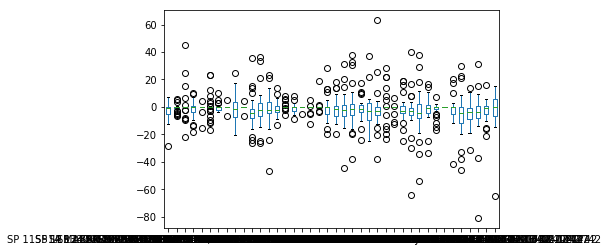

In [51]:
plt.show()

In [54]:
d_melt = pd.melt(df_reg_2, id_vars=['Sold-tocustomer'], value_vars=df_reg_2.columns)

TypeError: unhashable type: 'Index'

In [62]:
df_reg_2.columns

Index(['SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742',
       'SP 115514 MABANAFT DEUTSCHLAND GMBH & CO. KG: 03-02-1742',
       'SP 118366 GKG MINERALOEL HANDEL: 03-02-1742',
       'SP 120392 ANDREAS LORENZEN: 03-02-1742',
       'SP 122949 LIPPS ENERGIE GMBH: 03-02-1742',
       'SP 124365 MAIER & KORDULETSCH ENERGIE GMBH: 03-02-1742',
       'SP 124578 HANS HEINRICH MUNDT: 03-02-1742',
       'SP 149832 DS-MINERALOEL GMBH: 03-02-1742',
       'SP 178357 FRANK ROTH, MINERALOELHANDEL: 03-02-1742',
       'SP 178376 GEBR. HAUK MINERALOELHANDELS-: 03-02-1742',
       'SP 178379 HURST GMBH MINERALOELHANDEL: 03-02-1742',
       'SP 183153 DANIEL SPAETH GMBH: 03-02-1742',
       'SP 183181 KOPP MINERALOELE & BAUSTOFF GMBH: 03-02-1742',
       'SP 318278 BBG-WAERME U. SERVICE BUEDEN GMBH: 03-02-1742',
       'SP 318799 HEINRICH RENKEN: 03-02-1742',
       'SP 319002 HERMANN P.H. GARBERS HANDELSGESELL-: 03-02-1742',
       'SP 319105 BUNTE MINERALOELHANDEL GMBH: 03-02-1742',
       'SP 319

In [53]:
df_reg_2

Sold-tocustomer  SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742  \
0                                                       -3.176   
1                                                        0.000   
2                                                        0.000   
3                                                       -0.167   
4                                                       -5.431   
5                                                       -1.478   
6                                                        5.373   
7                                                        0.000   
8                                                       -7.929   
9                                                       -1.060   
10                                                       6.997   
11                                                       0.000   
12                                                      -5.972   
13                                                     -28.687   
14                                                      -3.640   
15                                                       0.000   
16                                                      -3.828   
17                                                       6.048   
18                                                       0.000   
19                                                      -7.667   
20                                                       3.473   
21                                                      -7.092   
22                                                      -0.774   
23                                                     -12.283   
24                                                      -0.815   
25                                                       0.000   
26                                                       0.160   
27                                                      -4.486   
28                                                      -7.317   
29                                                       3.980   
30                                                      -5.874   
31                                                       0.000   
32                                                       0.000   
33                                                       0.000   

Sold-tocustomer  SP 115514 MABANAFT DEUTSCHLAND GMBH & CO. KG: 03-02-1742  \
0                                                            0.000          
1                                                            0.000          
2                                                            0.000          
3                                                            0.000          
4                                                            0.000          
5                                                            0.000          
6                                                            0.000          
7                                                            0.000          
8                                                            0.000          
9                                                            0.000          
10                                                           5.701          
11                                                           0.000          
12                                                           0.000          
13                                                           0.000          
14                                                           0.000          
15                                                           0.000          
16                                                           0.420          
17                                                           0.000          
18                                                           0.000          
19                                                           0.000          
20                                                          -4.529      

In [63]:
df_anova = pd.read_excel(r'dummy_anova.xlsx')

In [75]:
df_anova_2 = df_anova.unstack().reset_index()

In [76]:
df_anova_2.columns = ['grp','slno','val']

In [77]:
df_anova_2

grp  slno  val
0    A     0   48
1    A     1   27
2    A     2   43
3    A     3   35
4    A     4   17
5    A     5    2
6    A     6   27
7    A     7   37
8    A     8   34
9    A     9   40
10   A    10   13
11   A    11    2
12   A    12    8
13   A    13   14
14   A    14   33
15   A    15    7
16   A    16    3
17   A    17   48
18   A    18   45
19   B     0   14
20   B     1   14
21   B     2   39
22   B     3   27
23   B     4   18
24   B     5   19
25   B     6   20
26   B     7   50
27   B     8   21
28   B     9   47
29   B    10   44
..  ..   ...  ...
46   C     8   14
47   C     9    5
48   C    10    9
49   C    11   49
50   C    12    3
51   C    13   23
52   C    14   13
53   C    15    9
54   C    16   47
55   C    17   39
56   C    18   25
57   D     0   27
58   D     1   50
59   D     2   31
60   D     3   17
61   D     4   25
62   D     5   11
63   D     6   50
64   D     7   17
65   D     8   14
66   D     9   32
67   D    10    4
68   D    11   13
69   D    12   19
70   D    13    3
71   D    14   38
72   D    15   13
73   D    16   49
74   D    17   39
75   D    18   45

[76 rows x 3 columns]

In [ ]:
df_anova.melt(id_vars=['index'],var_name="weigtedProfit")

In [69]:
df_s_1 = pd.melt(df_s,id_vars=["contract","Products"],var_name="Date",value_name="Volume")

Sold-tocustomer  SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742  \
0                                                       -3.176   
1                                                        0.000   
2                                                        0.000   
3                                                       -0.167   
4                                                       -5.431   
5                                                       -1.478   
6                                                        5.373   
7                                                        0.000   
8                                                       -7.929   
9                                                       -1.060   
10                                                       6.997   
11                                                       0.000   
12                                                      -5.972   
13                                                     -28.687   
14                                                      -3.640   
15                                                       0.000   
16                                                      -3.828   
17                                                       6.048   
18                                                       0.000   
19                                                      -7.667   
20                                                       3.473   
21                                                      -7.092   
22                                                      -0.774   
23                                                     -12.283   
24                                                      -0.815   
25                                                       0.000   
26                                                       0.160   
27                                                      -4.486   
28                                                      -7.317   
29                                                       3.980   
30                                                      -5.874   
31                                                       0.000   
32                                                       0.000   
33                                                       0.000   

Sold-tocustomer  SP 115514 MABANAFT DEUTSCHLAND GMBH & CO. KG: 03-02-1742  \
0                                                            0.000          
1                                                            0.000          
2                                                            0.000          
3                                                            0.000          
4                                                            0.000          
5                                                            0.000          
6                                                            0.000          
7                                                            0.000          
8                                                            0.000          
9                                                            0.000          
10                                                           5.701          
11                                                           0.000          
12                                                           0.000          
13                                                           0.000          
14                                                           0.000          
15                                                           0.000          
16                                                           0.420          
17                                                           0.000          
18                                                           0.000          
19                                                           0.000          
20                                                          -4.529      

In [78]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [79]:
model = ols('val ~ grp',data =df_anova_2).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

In [81]:
print(anova_table)

                sum_sq    df         F    PR(>F)
grp          69.934211   3.0  0.092379  0.964017
Residual  18168.842105  72.0       NaN       NaN


In [84]:
results = ols('val ~ C(grp)',data =df_anova_2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    val   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                   0.09238
Date:                Thu, 05 Mar 2020   Prob (F-statistic):              0.964
Time:                        17:48:41   Log-Likelihood:                -315.96
No. Observations:                  76   AIC:                             639.9
Df Residuals:                      72   BIC:                             649.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      25.4211      3.644      6.975      0.000        18.156    32.686
C(grp)[T.B]     0.5789      5.154      0.112      0.911        -9.695    10.853
C(grp)[T.C]    -1.6842      5.154     -0.327      0.745       -11.958     8.590
C(grp)[T.D]     0.7368      5.154      0.143      0.887        -9.537    11.011
==============================================================================
Omnibus:                       39.780   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.797
Skew:                           0.133   Prob(JB):                       0.0551
Kurtosis:                       1.673   Cond. No.                         4.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df_anova_2['libido'], df_anova_2['dose'])
mc_results = mc.tukeyhsd()
print(mc_results)

In [85]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

# Set up the data for comparison (creates a specialised object)
MultiComp = MultiComparison(df_anova_2['val'], df_anova_2['grp'])

# Show all pair-wise comparisons:

# Print the comparisons

print(MultiComp.tukeyhsd().summary())

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
  A      B     0.5789  -12.9765 14.1344 False 
  A      C    -1.6842  -15.2397 11.8713 False 
  A      D     0.7368  -12.8186 14.2923 False 
  B      C    -2.2632  -15.8186 11.2923 False 
  B      D     0.1579  -13.3976 13.7134 False 
  C      D     2.4211  -11.1344 15.9765 False 
----------------------------------------------


In [110]:
df_reg_3 = df_reg_2.unstack().reset_index()
df_reg_3.columns = ['SoldToCustomer','slno','wProfit']

In [97]:
model = ols('wProfit ~ SoldToCustomer',data =df_reg_3).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq      df         F    PR(>F)
SoldToCustomer    3509.820266    39.0  1.032551  0.415987
Residual        115048.955918  1320.0       NaN       NaN

In [166]:
# Set up the data for comparison (creates a specialised object)
MultiComp = MultiComparison(df_reg_3['wProfit'], df_reg_3['SoldToCustomer'])

# Show all pair-wise comparisons:

# Print the comparisons

print(MultiComp.tukeyhsd(alpha=0.1).summary())

Multiple Comparison of Means - Tukey HSD,FWER=0.10
 group1  group2 meandiff  lower    upper  reject
------------------------------------------------
 Cust_1 Cust_10  2.318   -6.0272  10.6632 False 
 Cust_1 Cust_11 -1.9178  -10.263   6.4275 False 
 Cust_1 Cust_12  1.3809  -6.9643   9.7262 False 
 Cust_1 Cust_13  0.7492   -7.596   9.0944 False 
 Cust_1 Cust_14  1.2188  -7.1264   9.564  False 
 Cust_1 Cust_15  2.747   -5.5982  11.0922 False 
 Cust_1 Cust_16  1.4318  -6.9134   9.777  False 
 Cust_1 Cust_17  2.2521  -6.0931  10.5973 False 
 Cust_1 Cust_18  1.9182   -6.427  10.2635 False 
 Cust_1 Cust_19  2.7967  -5.5485   11.142 False 
 Cust_1  Cust_2  1.8644  -6.4809  10.2096 False 
 Cust_1 Cust_20  1.7912   -6.554  10.1364 False 
 Cust_1 Cust_21  0.5219  -7.8234   8.8671 False 
 Cust_1 Cust_22  0.4701  -7.8752   8.8153 False 
 Cust_1 Cust_23  1.9181  -6.4272  10.2633 False 
 Cust_1 Cust_24  1.1179  -7.2273   9.4631 False 
 Cust_1 Cust_25 -0.7962  -9.1414   7.549  False 
 Cust_1 Cust_26  0

In [107]:
df_reg_2.columns = list(map(lambda x: 'Cust_'+str(x),list(range(1,41))))

['Cust_1',
 'Cust_2',
 'Cust_3',
 'Cust_4',
 'Cust_5',
 'Cust_6',
 'Cust_7',
 'Cust_8',
 'Cust_9',
 'Cust_10',
 'Cust_11',
 'Cust_12',
 'Cust_13',
 'Cust_14',
 'Cust_15',
 'Cust_16',
 'Cust_17',
 'Cust_18',
 'Cust_19',
 'Cust_20',
 'Cust_21',
 'Cust_22',
 'Cust_23',
 'Cust_24',
 'Cust_25',
 'Cust_26',
 'Cust_27',
 'Cust_28',
 'Cust_29',
 'Cust_30',
 'Cust_31',
 'Cust_32',
 'Cust_33',
 'Cust_34',
 'Cust_35',
 'Cust_36',
 'Cust_37',
 'Cust_38',
 'Cust_39',
 'Cust_40']

In [111]:
df_reg_3

SoldToCustomer  slno  wProfit
0            Cust_1     0   -3.176
1            Cust_1     1    0.000
2            Cust_1     2    0.000
3            Cust_1     3   -0.167
4            Cust_1     4   -5.431
5            Cust_1     5   -1.478
6            Cust_1     6    5.373
7            Cust_1     7    0.000
8            Cust_1     8   -7.929
9            Cust_1     9   -1.060
10           Cust_1    10    6.997
11           Cust_1    11    0.000
12           Cust_1    12   -5.972
13           Cust_1    13  -28.687
14           Cust_1    14   -3.640
15           Cust_1    15    0.000
16           Cust_1    16   -3.828
17           Cust_1    17    6.048
18           Cust_1    18    0.000
19           Cust_1    19   -7.667
20           Cust_1    20    3.473
21           Cust_1    21   -7.092
22           Cust_1    22   -0.774
23           Cust_1    23  -12.283
24           Cust_1    24   -0.815
25           Cust_1    25    0.000
26           Cust_1    26    0.160
27           Cust_1    27   -4.486
28           Cust_1    28   -7.317
29           Cust_1    29    3.980
...             ...   ...      ...
1330        Cust_40     4    4.991
1331        Cust_40     5    3.402
1332        Cust_40     6    6.296
1333        Cust_40     7  -65.173
1334        Cust_40     8    2.683
1335        Cust_40     9   -2.975
1336        Cust_40    10    6.647
1337        Cust_40    11   -0.478
1338        Cust_40    12   -8.024
1339        Cust_40    13    0.000
1340        Cust_40    14   -2.928
1341        Cust_40    15   14.473
1342        Cust_40    16  -14.981
1343        Cust_40    17    9.319
1344        Cust_40    18  -13.042
1345        Cust_40    19    0.000
1346        Cust_40    20   -5.085
1347        Cust_40    21    0.000
1348        Cust_40    22    0.808
1349        Cust_40    23  -14.836
1350        Cust_40    24   14.965
1351        Cust_40    25    8.019
1352        Cust_40    26   -1.326
1353        Cust_40    27    9.045
1354        Cust_40    28  -13.067
1355        Cust_40    29   -8.052
1356        Cust_40    30  -11.666
1357        Cust_40    31    7.310
1358        Cust_40    32   -6.967
1359        Cust_40    33   -4.464

[1360 rows x 3 columns]

In [115]:
import seaborn as sns

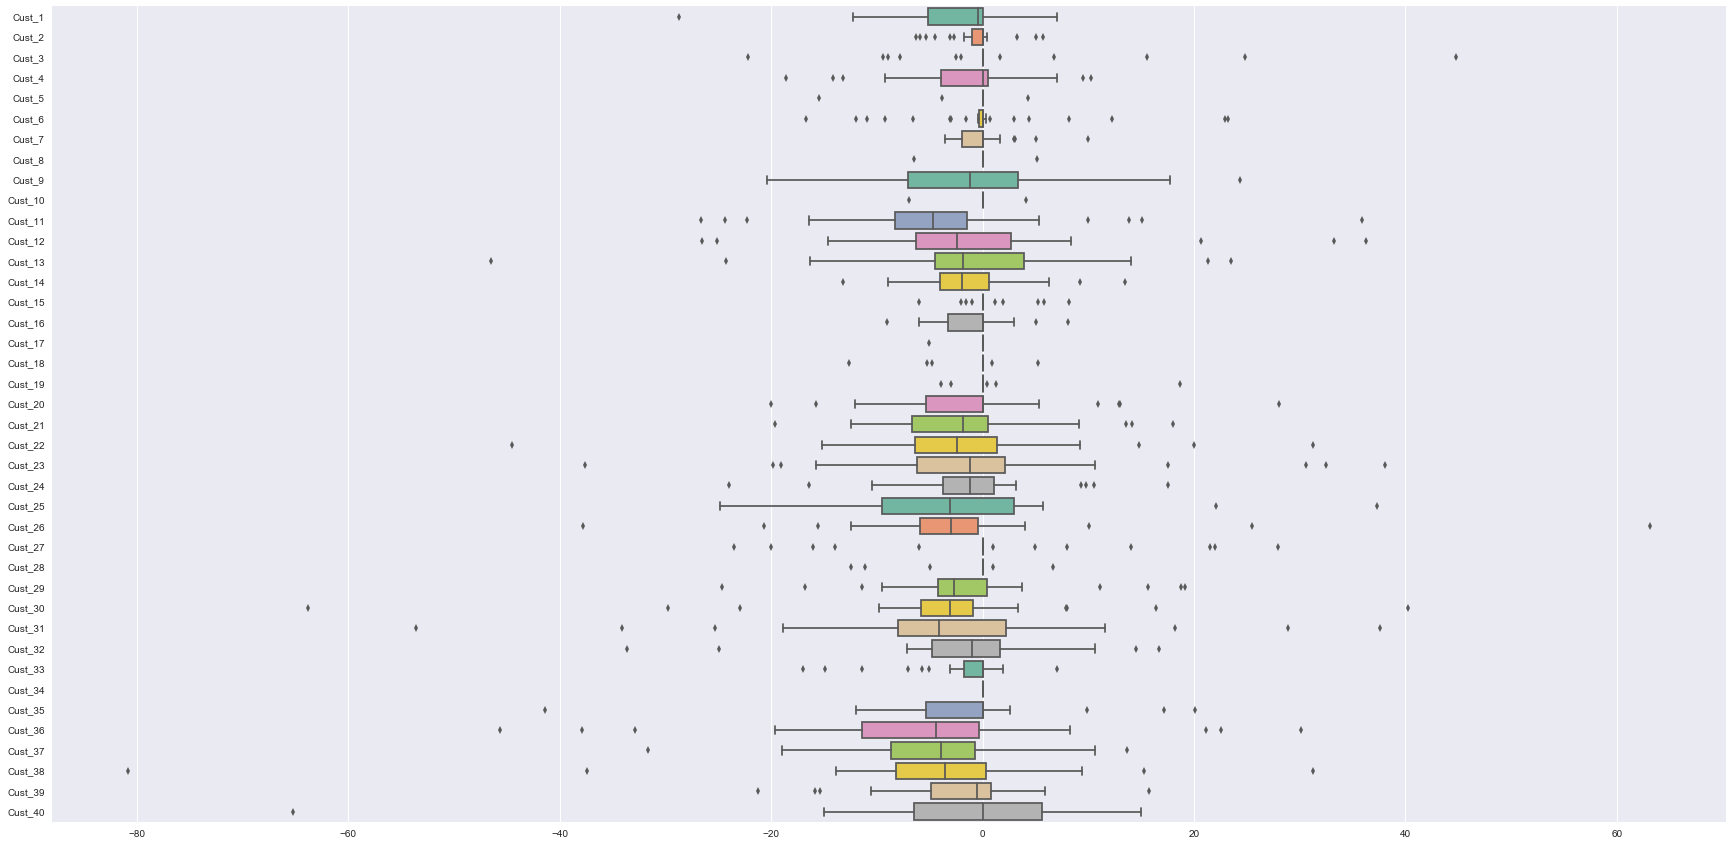

In [128]:
sns.boxplot(data=df_reg_2, orient="h", palette="Set2")

In [127]:
sns.set(rc={'figure.figsize':(30,15)})

In [119]:
%matplotlib inline
plt.figure(figsize=(16, 6))

In [140]:
df_anova_m = df_reg_1.T.stack().reset_index()

In [141]:
df_anova_m.columns = ['Cust','year_month','wProfit']

In [142]:
df_anova_m

Cust year_month  wProfit
0     SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742   Apr-2019   -3.176
1     SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742   Dec-2019    0.000
2     SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742   Jun-2019    0.000
3     SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742   Aug-2019   -0.167
4     SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742   Jan-2019   -5.431
5     SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742   Mar-2019   -1.478
6     SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742   Sep-2019    5.373
7     SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742   Oct-2018    0.000
8     SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742   Nov-2019   -7.929
9     SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742   Oct-2019   -1.060
10    SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742   May-2019    6.997
11    SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742   Jul-2019    0.000
12    SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742   Feb-2019   -5.972
13    SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742   Aug-2018  -28.687
14    SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742   Jun-2018   -3.640
15    SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742   Nov-2018    0.000
16    SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742   Apr-2018   -3.828
17    SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742   Dec-2018    6.048
18    SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742   Sep-2018    0.000
19    SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742   Jul-2018   -7.667
20    SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742   May-2018    3.473
21    SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742   Mar-2018   -7.092
22    SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742   Feb-2018   -0.774
23    SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742   Sep-2017  -12.283
24    SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742   Jan-2018   -0.815
25    SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742   Apr-2017    0.000
26    SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742   Dec-2017    0.160
27    SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742   Aug-2017   -4.486
28    SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742   Jul-2017   -7.317
29    SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742   Nov-2017    3.980
...                                             ...        ...      ...
1330                  SP 320145 GUMMERT: 03-02-1742   Jan-2019    4.991
1331                  SP 320145 GUMMERT: 03-02-1742   Mar-2019    3.402
1332                  SP 320145 GUMMERT: 03-02-1742   Sep-2019    6.296
1333                  SP 320145 GUMMERT: 03-02-1742   Oct-2018  -65.173
1334                  SP 320145 GUMMERT: 03-02-1742   Nov-2019    2.683
1335                  SP 320145 GUMMERT: 03-02-1742   Oct-2019   -2.975
1336                  SP 320145 GUMMERT: 03-02-1742   May-2019    6.647
1337                  SP 320145 GUMMERT: 03-02-1742   Jul-2019   -0.478
1338                  SP 320145 GUMMERT: 03-02-1742   Feb-2019   -8.024
1339                  SP 320145 GUMMERT: 03-02-1742   Aug-2018    0.000
1340                  SP 320145 GUMMERT: 03-02-1742   Jun-2018   -2.928
1341                  SP 320145 GUMMERT: 03-02-1742   Nov-2018   14.473
1342                  SP 320145 GUMMERT: 03-02-1742   Apr-2018  -14.981
1343                  SP 320145 GUMMERT: 03-02-1742   Dec-2018    9.319
1344                  SP 320145 GUMMERT: 03-02-1742   Sep-2018  -13.042
1345                  SP 320145 GUMMERT: 03-02-1742   Jul-2018    0.000
1346                  SP 320145 GUMMERT: 03-02-1742   May-2018   -5.085
1347                  SP 320145 GUMMERT: 03-02-1742   Mar-2018    0.000
1348                  SP 320145 GUMMERT: 03-02-1742   Feb-2018    0.808
1349                  SP 320145 GUMMERT: 03-02-1742   Sep-2017  -14.836
1350                  SP 320145 GUMMERT: 03-02-1742   Jan-2018   14.965
1351                  SP 320145 GUMMERT: 03-02-1742   Apr-2017    8.019
1352                  SP 320145 GUMMERT: 03-02-1742   Dec-2017   -1.326
1353                  SP 320145 GUMMERT: 03-02-1742   Aug-2017    9.045
1354           

In [147]:
df_reg_1.T

Apr-2019  Dec-2019  \
Sold-tocustomer                                                          
SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742         -3.176     0.000   
SP 115514 MABANAFT DEUTSCHLAND GMBH & CO. KG: 0...     0.000     0.000   
SP 118366 GKG MINERALOEL HANDEL: 03-02-1742            0.000     0.000   
SP 120392 ANDREAS LORENZEN: 03-02-1742                 0.427    -2.363   
SP 122949 LIPPS ENERGIE GMBH: 03-02-1742               0.000     0.000   
SP 124365 MAIER & KORDULETSCH ENERGIE GMBH: 03-...     0.000     0.674   
SP 124578 HANS HEINRICH MUNDT: 03-02-1742              0.000     0.000   
SP 149832 DS-MINERALOEL GMBH: 03-02-1742               0.000     0.000   
SP 178357 FRANK ROTH, MINERALOELHANDEL: 03-02-1742     0.000     0.000   
SP 178376 GEBR. HAUK MINERALOELHANDELS-: 03-02-...     0.000     0.000   
SP 178379 HURST GMBH MINERALOELHANDEL: 03-02-1742     -3.423    -5.955   
SP 183153 DANIEL SPAETH GMBH: 03-02-1742              -4.064    -6.809   
SP 183181 KOPP MINERALOELE & BAUSTOFF GMBH: 03-...    -3.328    -7.141   
SP 318278 BBG-WAERME U. SERVICE BUEDEN GMBH: 03...    -2.232    -3.101   
SP 318799 HEINRICH RENKEN: 03-02-1742                  0.000     0.000   
SP 319002 HERMANN P.H. GARBERS HANDELSGESELL-: ...     0.000     0.000   
SP 319105 BUNTE MINERALOELHANDEL GMBH: 03-02-1742      0.000     0.000   
SP 319142 KRIMPHOFF & SCHULTE MINERALOELE: 03-0...     0.000     0.000   
SP 319144 HEINZ BOEHRING GMBH: 03-02-1742              0.000     0.000   
SP 319199 HEINRICH RIECKMANN: 03-02-1742               0.000     0.000   
SP 319585 BRENNSTOFFVERTRIEB WILHELM HOLDORF: 0...   -10.974     0.000   
SP 319933 ANDREAS SAUTER GMBH & CO. KG: 03-02-1742    -5.177    -3.017   
SP 319963 BETZ-MAIER GMBH+CO.KG: 03-02-1742           -1.234     0.000   
SP 319964 GERHARD SCHAIBLE: 03-02-1742                 3.183   -10.416   
SP 319965 GULDE BRENNSTOFFE GMBH: 03-02-1742          -2.387   -14.539   
SP 319976 ERNST EBERHARDT GMBH: 03-02-1742            -1.594    -2.014   
SP 319997 WEBER GMBH: 03-02-1742                       0.000     0.000   
SP 320027 SCHUSTER U. SOHN KG: 03-02-1742              0.000   -11.074   
SP 320028 MANFRED WELSCH GMBH: 03-02-1742              0.417    -2.806   
SP 320029 WALTER DUPS E. K.: 03-02-1742               -1.288    -5.758   
SP 320030 MOWAG MAIER & CIE. GMBH: 03-02-1742         -3.910    -5.860   
SP 320035 ARNOLD GMBH: 03-02-1742                     -5.137    -2.719   
SP 320040 GEORG WILHELM JAEGER INH. HARTMUTH: 0...     0.000     0.000   
SP 320057 KNIES + LAGOTKA GMBH & CO.: 03-02-1742       0.000     0.000   
SP 320062 KARL MAURER: 03-02-1742                      0.000     0.000   
SP 320134 CARL HAISCH GMBH + CO. KG: 03-02-1742       -4.232   -19.621   
SP 320135 FRANZ VOGEL GMBH: 03-02-1742                -3.963    -4.043   
SP 320138 ROLF SCHOENINGER: 03-02-1742                -1.406    -3.999   
SP 320141 KAY LEIBOLD: 03-02-1742                      0.000     0.378   
SP 320145 GUMMERT: 03-02-1742                          0.000    -2.538   

                                                    Jun-2019  Aug-2019  \
Sold-tocustomer                                                          
SP 115380 ADOLF ROTH GMBH & CO KG: 03-02-1742          0.000    -0.167   
SP 115514 MABANAFT DEUTSCHLAND GMBH & CO. KG: 0...     0.000     0.000   
SP 118366 GKG MINERALOEL HANDEL: 03-02-1742            0.000     0.000   
SP 120392 ANDREAS LORENZEN: 03-02-1742                 1.145     0.020   
SP 122949 LIPPS ENERGIE GMBH: 03-02-1742               0.000     0.000   
SP 124365 MAIER & KORDULETSCH ENERGIE GMBH: 03-...     0.312    -9.261   
SP 124578 HANS HEINRICH MUNDT: 03-02-1742              0.000     0.000   
SP 149832 DS-MINERALOEL GMBH: 03-02-1742               0.000    -6.456   
SP 178357 FRANK ROTH, MINERALOELHANDEL: 03-02-1742    -7.533    15.114   
SP 178376 GEBR. HAUK MINERALOELHANDELS-: 03-02-...     0.000     0.000   
SP 178379 HURST GMBH MINERALOELHANDEL: 03-02-1742     -

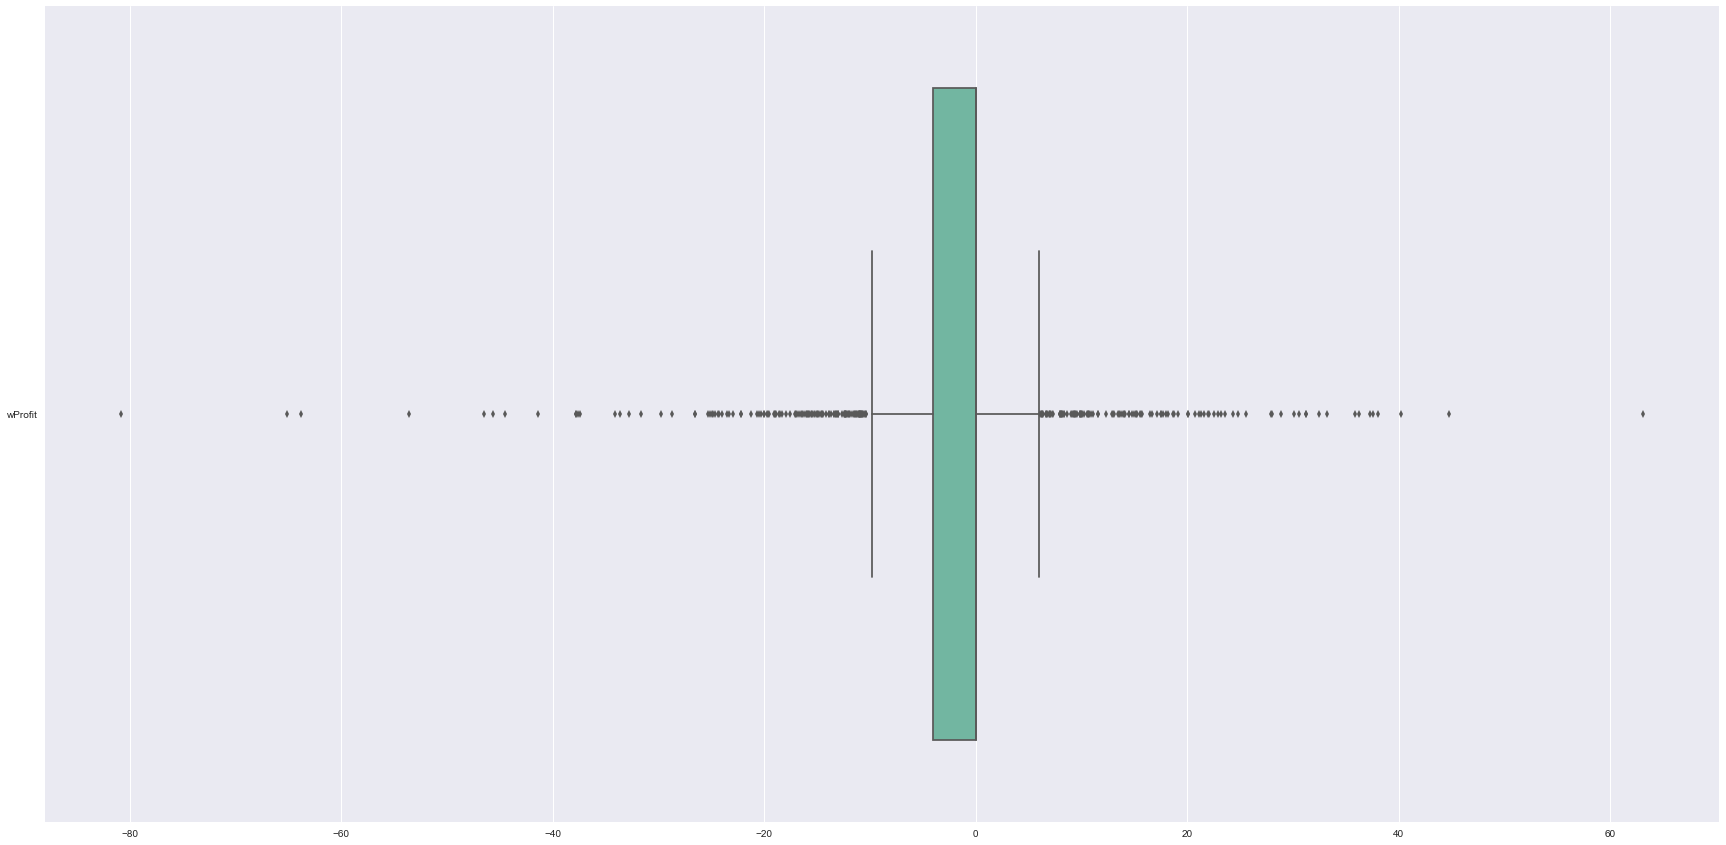

In [148]:
sns.boxplot(data=df_anova_m,orient="h", palette="Set2")

In [143]:
model = ols('wProfit ~ year_month',data =df_anova_m).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq      df          F        PR(>F)
year_month  35312.311478    33.0  17.044722  1.436269e-79
Residual    83246.464706  1326.0        NaN           NaN

In [149]:
# Set up the data for comparison (creates a specialised object)
MultiComp = MultiComparison(df_anova_m['wProfit'], df_anova_m['year_month'])

# Show all pair-wise comparisons:

# Print the comparisons

print(MultiComp.tukeyhsd(alpha=0.05).summary())

 Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1   group2  meandiff  lower    upper   reject
---------------------------------------------------
Apr-2017 Apr-2018  -9.669  -16.4343 -2.9037   True 
Apr-2017 Apr-2019 -6.9456  -13.7109 -0.1804   True 
Apr-2017 Aug-2017 -8.1603  -14.9255  -1.395   True 
Apr-2017 Aug-2018 -18.383  -25.1483 -11.6178  True 
Apr-2017 Aug-2019 -7.2861  -14.0514 -0.5208   True 
Apr-2017 Dec-2017 -9.1852  -15.9504 -2.4199   True 
Apr-2017 Dec-2018  5.5545  -1.2108  12.3197  False 
Apr-2017 Dec-2019 -8.4262  -15.1915 -1.6609   True 
Apr-2017 Feb-2018 -4.9739  -11.7391  1.7914  False 
Apr-2017 Feb-2019 -9.5755  -16.3408 -2.8102   True 
Apr-2017 Jan-2018 -4.9041  -11.6694  1.8611  False 
Apr-2017 Jan-2019 -9.4726  -16.2379 -2.7074   True 
Apr-2017 Jul-2017 -7.5084  -14.2736 -0.7431   True 
Apr-2017 Jul-2018 -6.7526  -13.5179  0.0126  False 
Apr-2017 Jul-2019 -6.0944  -12.8596  0.6709  False 
Apr-2017 Jun-2017 -7.4627  -14.228  -0.6974   True 
Apr-2017 Jun

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


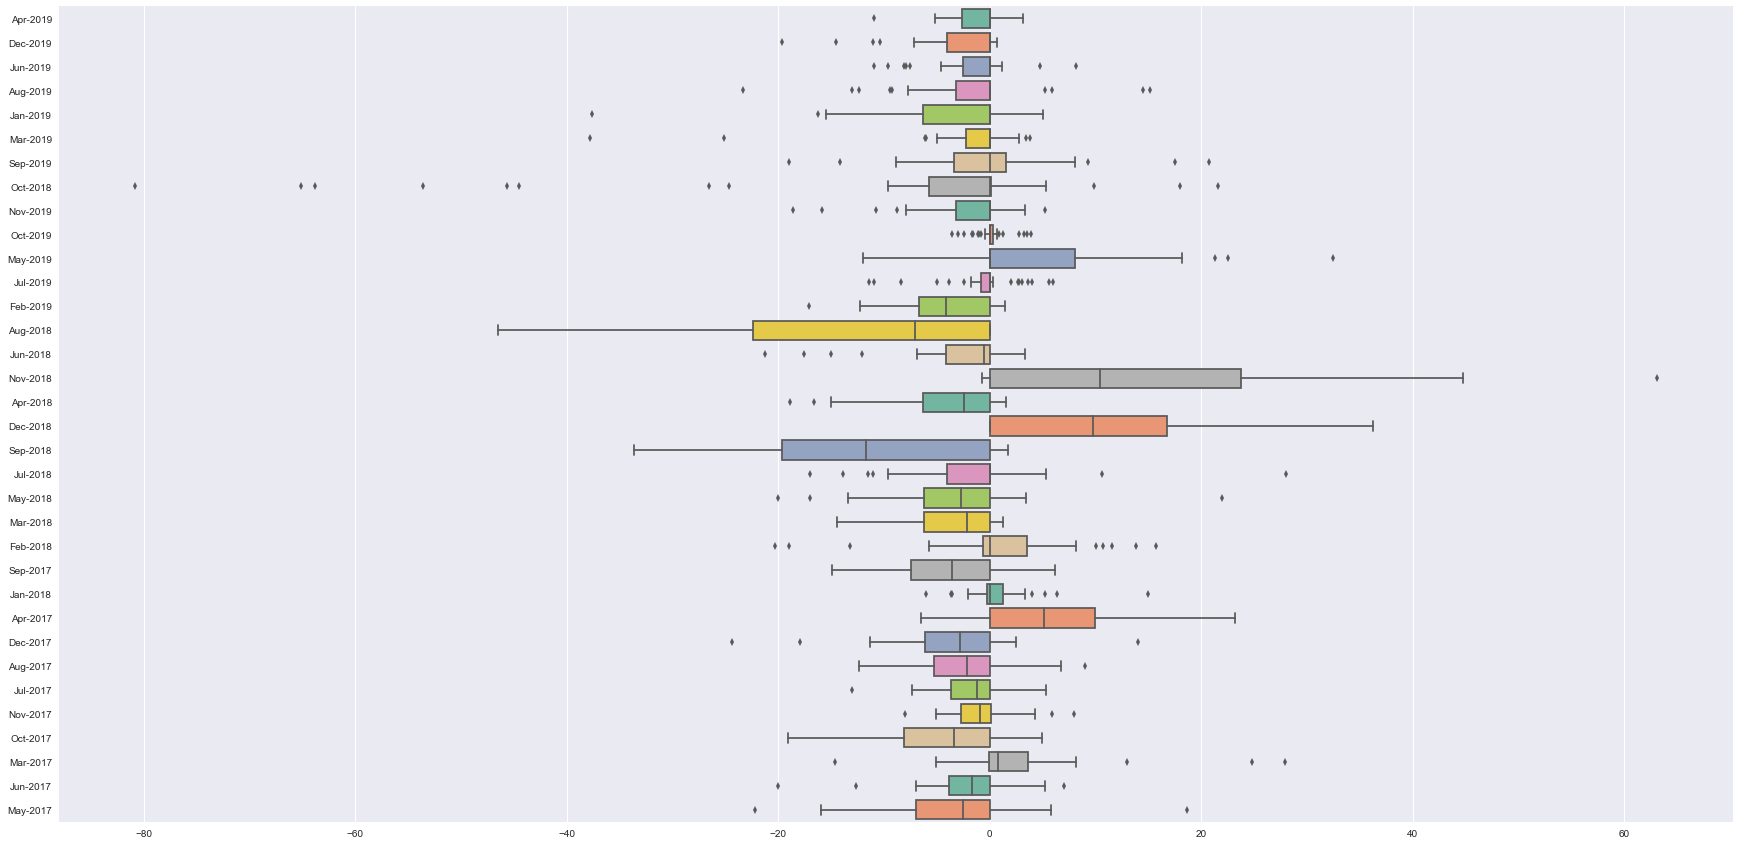

In [161]:
sns.boxplot(df_reg_1.T.reset_index(drop=True),orient="h", palette="Set2")

In [160]:
df_reg_1.T.reset_index(drop=True)

Apr-2019  Dec-2019  Jun-2019  Aug-2019  Jan-2019  Mar-2019  Sep-2019  \
0     -3.176     0.000     0.000    -0.167    -5.431    -1.478     5.373   
1      0.000     0.000     0.000     0.000     0.000     0.000     0.000   
2      0.000     0.000     0.000     0.000     0.000     0.000     0.000   
3      0.427    -2.363     1.145     0.020     0.000     0.410   -14.125   
4      0.000     0.000     0.000     0.000     0.000     0.000     0.000   
5      0.000     0.674     0.312    -9.261     4.416    -2.954     0.000   
6      0.000     0.000     0.000     0.000     0.000     0.000     0.000   
7      0.000     0.000     0.000    -6.456     0.000     0.000     0.000   
8      0.000     0.000    -7.533    15.114     0.145     0.000    -5.741   
9      0.000     0.000     0.000     0.000     0.000     0.000     0.000   
10    -3.423    -5.955    -4.606    -1.575    -8.390    -3.396    -7.465   
11    -4.064    -6.809     8.139     0.000    -3.100   -25.144    20.701   
12    -3.328    -7.141    -2.474   -13.004   -16.277    -2.096    -4.013   
13    -2.232    -3.101    -2.738    -2.240    -5.173    -0.559    -8.904   
14     0.000     0.000     0.000     0.000     0.000     0.000     0.000   
15     0.000     0.000     0.000     0.000     0.000     0.000     8.038   
16     0.000     0.000     0.000     0.000     0.000     0.000     0.000   
17     0.000     0.000     0.000     0.000     0.000     0.000     0.000   
18     0.000     0.000     0.000     0.000     0.000     0.000     0.000   
19     0.000     0.000     0.000     0.000     0.000     0.000     0.000   
20   -10.974     0.000    -1.582   -12.414    -9.843    -2.198     3.552   
21    -5.177    -3.017    -9.628     5.192    -8.025    -1.446     9.248   
22    -1.234     0.000    -1.100     0.000   -37.636    -6.168    17.540   
23     3.183   -10.416    -1.219    -1.219    -6.329    -5.991    -3.597   
24    -2.387   -14.539    -0.457   -23.344    -6.325     3.831    -6.970   
25    -1.594    -2.014    -2.778    -3.835    -0.007   -37.819     4.061   
26     0.000     0.000     0.000     0.000     0.000     0.000     0.000   
27     0.000   -11.074     0.000     0.000     0.000    -4.985     0.000   
28     0.417    -2.806    -3.861    -6.915    -5.906    -4.215     1.373   
29    -1.288    -5.758    -1.666    -3.850    -3.400    -2.435    -3.813   
30    -3.910    -5.860    -8.143    -7.763    -8.216     2.747    -0.573   
31    -5.137    -2.719    -2.165    14.538    -4.982    -0.203    -5.404   
32     0.000     0.000     0.000     0.000     0.000     0.000     0.000   
33     0.000     0.000     0.000     0.000     0.000     0.000     0.000   
34     0.000     0.000     0.000     0.000     0.000     0.000     0.000   
35    -4.232   -19.621   -10.983    -1.162   -11.871    -1.187    -3.316   
36    -3.963    -4.043    -3.880    -3.041   -15.502    -0.669   -19.005   
37    -1.406    -3.999    -7.958    -9.480    -6.605    -0.653     5.103   
38     0.000     0.378     0.000    -2.127    -1.112    -4.980     1.945   
39     0.000    -2.538     4.754     5.872     4.991     3.402     6.296   

    Oct-2018  Nov-2019  Oct-2019    ...     Jan-2018  Apr-2017  Dec-2017  \
0      0.000    -7.929    -1.060    ...       -0.815     0.000     0.160   
1      0.000     0.000     0.000    ...       -1.210     3.249    -5.339   
2      0.000     0.000     0.000    ...        0.000     0.000    -8.926   
3      0.000   -18.572     0.135    ...        0.555     7.023    -0.538   
4      0.000     0.000     0.000    ...        0.000     0.000     0.000   
5      0.000    -0.418    -1.582    ...        0.000    23.217     0.000   
6      5.045     0.000     0.000    ...       -3.549    -2.770    -1.996   
7      0.000     5.181     0.000    ...        0.000     0.000     0.000   
8      5.357   -10.798     3.227    ...        4.010    -2.788   -17.995   
9      0.000     0.000     0.000    ...        0.000     0.000     0.000   
10   -26.601    -7.927     0.444    ...       -1.45